# <center>Tarea 3<center>
# <center>Para entregar el 29 de octubre<center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. ¿Qué es Batch normalization? Escribe un reporte breve explicando qué es, para qué sirve y cómo se realiza. Incluye ejemplos ilustrativos (sencillos).

### <font color=green>Tu respuesta aquí</font>

Recordando de la tarea 1, considerando un problema de clasificación multiclase y una red neuronal densa con una capa oculta, como se muestra en la figura 1.
<img src="Tarea3_victor_gomez_Fig1.png" height="40%" width="40%"/>
<center> Figura 1: Red neuronal <center>

    
    
    
Considerando también el uso de la función sigmoide como activación de las unidades ocultas, la función softmax para las estimaciones en la capa de salida y cross-entropy como función de costo.

Para el paso backpropagation donde se obtienen los pesos, necesitamos calcular $\frac{{\partial L}}{{\partial {W_2}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial {W_2}}}} \right)$, $\frac{{\partial L}}{{\partial {b_2}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial {b_2}}}} \right)$ , $\frac{{\partial L}}{{\partial {W_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial {W_1}}}$, $\frac{{\partial L}}{{\partial {b_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial {b_1}}}$, 

donde:
 $\left( {d{z_2}} \right) = {\hat y_{}} - {y_{}}$,
$d{W_2} = \frac{{\partial L}}{{\partial {W_2}}} = d{z_2}{h^t}$,$d{b_2} = \frac{{\partial L}}{{\partial {b_2}}} = d{z_2}$,
 $d{z_1} = \frac{{\partial L}}{{\partial {z_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right) = W_2^td{z_2}\left( {\sigma \left( {{z_1}} \right)\left( {1 - \sigma \left( {{z_1}} \right)} \right)} \right)$, 
$d{W_1} = \frac{{\partial L}}{{\partial {W_1}}} = d{z_1}{X^t}$, $d{b_1} = \frac{{\partial L}}{{\partial {b_1}}} = d{z_1}$

Es decir que los pesos de cada capa, dependen de las salidas de la capa anterior, por lo que si se normalizan $\left( {z_{norm}^i = \frac{{{z^i} - \mu }}{\sigma }} \right)$ las entradas a las funciones de activación, es decir ${z_1}$, disminuye el efecto de una mayor varianza que puedan tener algunas variables o unidades y se pueden obtener gradientes mas grandes y por lo tanto acelerar el aprendizaje de los pesos en cada capa, debido a que se aprovecha la parte lineal de la función de activación alrededor del cero (línea verde), dado que de otra forma la gran varianza de algunas variables o unidades en las capas podría hacer que se caiga en la zona de gradientes muy pequeños (aproximadamente cero) haciendo que el aprendizaje sea muy lento (línea roja). Esto también disminuye el efecto de dependencia de las otras capas para el calculo de los pesos de la capa actual.

<img src="Tarea3_victor_gomez_Fig2.png" height="40%" width="40%"/>
<center> Figura 2: Función Sigmoide <center>

## 2. Dados los siguientes parámetros para algún eje (canal) de un tensor:

### - $i$: tamaño de los datos de entrada (cuadradas: $i_1=i_2=i$) 
### - $k$: tamaño de un kernel de convolución cuadrado
### - $s$: tamaño de stride (igual en ambas direcciones)
### - $p$: zero padding (igual en ambas direcciones)

## obtén una expresión para calcular:
## a) el tamaño de salida del mapeo luego de realizar una convolución.
## b) el tamaño de salida del proceso de pooling

### <font color=green>Tu respuesta aquí</font>

### a)
Para obtener el mapeo de salida al aplicar una convolución, según el tamaño de la imagen de entrada $i$, el tamaño de filtro o kernel que se aplica $k$, el stride $s$ y el padding $p$ (valid $p = 0$, o same $p = \frac{{k - 1}}{2}$): $\frac{{\left( {i + 2p} \right) - k}}{s} + 1$.
Por ejemplo para una imagen de tamaño $i = 7$, aplicando un kernel $k = 3$, que se mueva de 2 en dos (stride $s = 2$) con padding $p = 1$, entonces $\frac{{\left( {7 + 2\left( 1 \right)} \right) - 3}}{2} + 1 = 4$

### b)
Para el tamaño de salida por el proceso de pooling se puede utilizar la misma fórmula, pero con padding valid ($p = 0$): $\frac{{\left( i \right) - k}}{s} + 1$.
Y siguiendo con el ejemplo, aplicando maxpooling a la capa de convolución anterior con un kernel de $k = 2$ y un stride $s = 2$, entonces $\frac{{\left( 4 \right) - 2}}{2} + 1 = 2$


## 3. En el archivo `wildlife.tar.gz`, se encuentra un conjunto pequeño de imágenes de distintos animales salvajes, con la siguiente distribución;

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")
# observa cual es mi directorio...
os.chdir('/content/drive/My Drive/Colab Notebooks/Tarea 3-20201020')

# ya esta descomprimido, y guardado con esta estructura de directorio
data_set = 'data/images_wildlife/wildlife'

labels = os.listdir(data_set)
print("Categorias:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder {}: imagenes {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total de imagenes:', total)


Categorias: 20
folder columbian_black-tailed_deer: imagenes 735
folder cougar: imagenes 680
folder seals: imagenes 698
folder virginia_opossum: imagenes 728
folder gray_fox: imagenes 668
folder gray_wolf: imagenes 730
folder bald_eagle: imagenes 748
folder sea_lions: imagenes 726
folder ringtail: imagenes 588
folder red_fox: imagenes 759
folder canada_lynx: imagenes 717
folder mountain_beaver: imagenes 577
folder nutria: imagenes 701
folder bobcat: imagenes 696
folder black_bear: imagenes 718
folder coyote: imagenes 736
folder raven: imagenes 656
folder raccoon: imagenes 728
folder deer: imagenes 764
folder elk: imagenes 660
Total de imagenes: 14013


#### De las 20 etiquetas, nos enfocaremos en 5 de ellas: `deer`, `red fox`, `bald eagle`, `gray wolf` y `coyote`. Para facilitarte el ejercicio, he preparado dos archivos con los datos de las imágenes de éstas 5 categorias. En  `imagenes_info_train.csv` e `imagenes_info_test.csv`, se encuentra la información de las imágenes de entrenamiento y prueba, respectívamente. En cada uno, encontrarás el nombre de la imagen y su categoría correspondiente. Una muestra de las imágenes de entrenamiento es la siguiente.

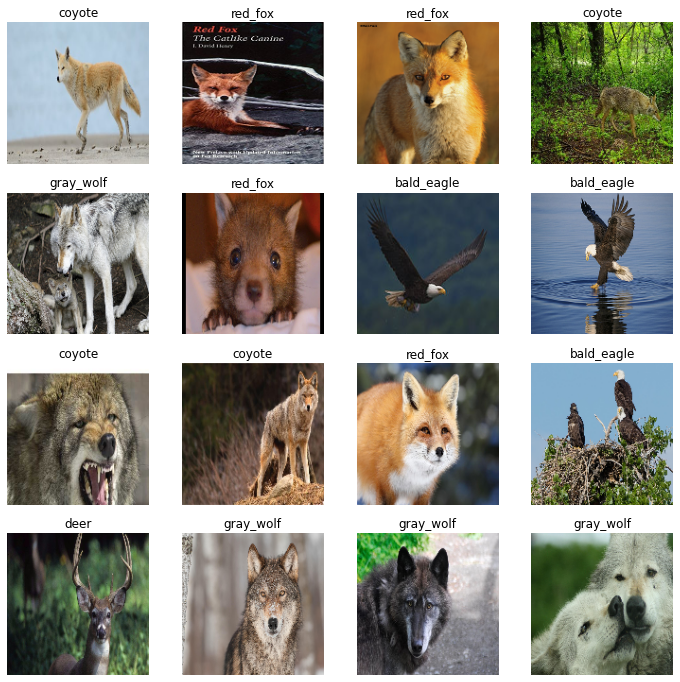

In [ ]:
def plot_sample(imgs_set, labels_set, img_size=(12,12), columns=4, rows=4, random=False):
    """
    Plot a sample of images
    """
    
    fig=plt.figure(figsize=img_size)
    
    for i in range(1, columns*rows + 1):
        
        if random:
            img_x = np.random.randint(0, len(imgs_set))
        else:
            img_x = i-1

        img = imgs_set[img_x]
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(str(labels_set[img_x]))
        plt.axis('off')
        im = cv2.imread(img)
        im_resized = cv2.resize(im, (150, 150), interpolation=cv2.INTER_LINEAR)
        plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

traindf=pd.read_csv('data/images_wildlife/imagenes_info_train.csv',dtype=str)
testdf=pd.read_csv('data/images_wildlife/imagenes_info_test.csv',dtype=str)

## grafica algunas imagenes de prueba
plot_sample(traindf.iloc[:,0],traindf.iloc[:,1],random=True)
   

#### en la siguiente celda, verás la implementación y resultados de un modelo 'simple'

In [6]:
# data generators
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import time

minibatch_size = 20
n_classes = 5
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

# funcion para verificar el tiempo transcurrido
def elapsed(start):
    # Returns elapsed time in hh:mm:ss format from start time in unix format
    elapsed = time.time()-start
    return time.strftime("%H:%M:%S", time.gmtime(elapsed))

train_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
        dataframe=traindf,
        x_col="filename",
        y_col="label",
        subset="validation",
        batch_size=minibatch_size,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    x_col="filename",
    y_col='label',
    batch_size=minibatch_size,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 6 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 2536 validated image filenames belonging to 5 classes.
Found 634 validated image filenames belonging to 5 classes.
Found 560 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 6 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
# un modelo 'simple'
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu')) # CHECAR LAS UNIDADES!!!!!
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
start = time.time()
history = model.fit(
      train_generator,
      validation_data = valid_generator,
      steps_per_epoch = 100, #int(len(traindf) / minibatch_size),
      validation_steps= 30, #int(int(len(traindf)*.2)/minibatch_size),
      initial_epoch = 0,
      epochs=50,
      verbose = 1)
print('\nElapsed time: {}'.format(elapsed(start)))

Epoch 1/50
100/100 [==============================] - 46s 459ms/step - loss: 1.0276 - accuracy: 0.5802 - val_loss: 5.4920 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 49s 488ms/step - loss: 0.9165 - accuracy: 0.6155 - val_loss: 5.0898 - val_accuracy: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 49s 490ms/step - loss: 0.8500 - accuracy: 0.6593 - val_loss: 5.9652 - val_accuracy: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 49s 488ms/step - loss: 0.8023 - accuracy: 0.6703 - val_loss: 5.0627 - val_accuracy: 0.0000e+00
Epoch 5/50
100/100 [==============================] - 48s 485ms/step - loss: 0.7656 - accuracy: 0.6835 - val_loss: 4.6343 - val_accuracy: 0.0000e+00
Epoch 6/50
100/100 [==============================] - 51s 506ms/step - loss: 0.7234 - accuracy: 0.7139 - val_loss: 5.2521 - val_accuracy: 0.0000e+00
Epoch 7/50
100/100 [==============================] - 50s 502ms/step - loss: 0.6875 - accuracy: 0.7285 - v

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


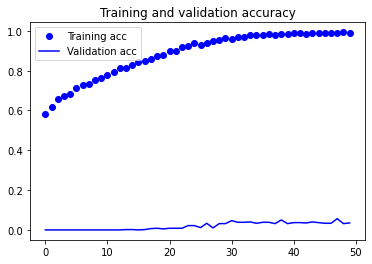

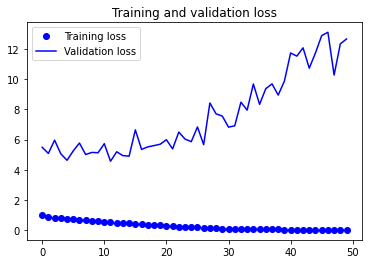

In [ ]:
model.save('data/images_wildlife/model_baseline1.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

28/28 [==============================] - 7s 264ms/step - loss: 3.0223 - accuracy: 0.7589
test acc: 0.7589285969734192


### a) Toma el resultado anterior como tu Baseline. El objetivo es superar ése baseline. Para esto, aplica TODO lo que has aprendido hasta ahora, buscando un modelo que tenga un buen error de generalización y una buena precisión (al menos, mejor que tu baseline). Para esto, usa Transfer Learning con algún modelo pre-entrenado de Keras (VGG16, VGG19, Xception, InceptionV3, ResNet50, MobileNet, etc), así como los métodos de regularización que conoces.
  ### Explica todos los pasos y detalles de tu arquitectura.
  ### EL MODELO GANADOR, TENDRÁ UNA BUENA RECOMPENSA

El mejor modelo consiste en una base convolucional del modelo pre entrenado MobileNet, seguido de una cada de aplanamiento, y dos capas ocultas de 206 unidades cada una con función de activación elu, con batch normalization y finalmente la capa de clasificación con 5 unidades con función de activación softmax. Se utilizó, optimizador Adamax con learning rate de 0.01, parámetros 6,649,449. Accuracy en el conjunto de prueba de 0.968.

In [8]:
import tensorflow as tf
Modelo1 = tf.keras.models.load_model('Tarea3_victor_gomez_Model..h5') #carga el mejor modelo
Modelo1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 206)               3375310   
_________________________________________________________________
batch_normalization_4 (Batch (None, 206)               824       
_________________________________________________________________
dense_6 (Dense)              (None, 206)               42642     
_________________________________________________________________
batch_normalization_5 (Batch (None, 206)               824       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
test_loss, test_acc = Modelo1.evaluate(test_generator)
print('test acc:', test_acc)

12/28 [===========>..................] - ETA: 6s - loss: 0.1880 - accuracy: 0.9583

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 11s 400ms/step - loss: 0.1435 - accuracy: 0.9679
test acc: 0.9678571224212646


- Para la construcción del modelo primero se utilizó TransferLearning con el enfoque de obtener los embeddings de un modelo convolucional pre entrenado (sin la capa densa para clasificación) de los disponibles en Keras y guardar los datos en disco para después probarlo con un clasificador. La base convolucional se probó con los modelos Xception, VGG16, ResNet50, InceptionV3, MobileNet, DenseNet121 y EfficientNet, para los cuales después de obtener los embeddings se conectó al mismo clasificador del Baseline. Para esto se utilizó el 40% de las imágenes disponibles para los conjuntos de entrenamiento, validación y prueba originales y se entrenó cada uno para 3 épocas bajo las mismas condiciones que el Baseline, buscando los 3 mejores con los que se obtenía un mejor accuracy para el conjunto de prueba.


- Posteriormente con los 3 mejores, se repitió lo mismo, pero con algunas de sus otras versiones disponibles para ver si mejoraban o no y finalmente se seleccionó como mejor el modelo MobileNet.


- El siguiente paso fue bajo las mismas condiciones, tratar ahora de mejorar el clasificador, buscando de forma aleatoria el tamaño del minibatch, función de activación, y optimizadores, encontrando el optimizador Adamax, con tamaño de minibatch de 8 y función de activación elu como el mejor. Posteriormente se buscó el número de capas y unidades en cada capa, igual de forma aleatoria, encontrando dos capas ocultas cada una con 206 unidades. Finalmente, se probó con diferentes tamaños del learning rate encontrando el mejor en 0.01, y por último probando si aplicando BatchNormalization ayudaba al entrenamiento del modelo, donde efectivamente lo mejoró. 


- Con los resultados obtenidos del paso anterior ahora se utilizó el enfoque de congelar la base convolucional y conectarla al clasificador para utilizar DataAugment en el conjunto de entrenamiento, aquí ya se utilizó el conjunto completo de entrenamiento, validación y prueba. Se entrenó utilizando early stopping para evitar que comenzara a sobre ajustar, donde se alcanzó un accuracy de 0.9554.


- Por último ya habiendo entrenado el clasificador, se utilizó ahora el enfoque de Fine Tuning, entrenando el ultimo bloque de la capa convolucional junto con el clasificador, ahora con un learning rate un poco mas pequeño de 0.009 y nuevamente utilizando earlystopping para evitar sobre ajustar, logrando que mejore el accuracy a 0.9679.


In [ ]:
%load_ext tensorboard

#%tensorboard --logdir logs #problema, no se ejecuta esta linea

# Starts a TensorBoard server on the logs directory, on port 6006
# and opens a new tab in your browser to use it.
def tb(logdir="logs", port=6006, open_tab=True, sleep=2):
    import subprocess
    proc = subprocess.Popen(
        "tensorboard --logdir={0} --port={1}".format(logdir, port), shell=True)
    if open_tab:
        import time
        time.sleep(sleep)
        import webbrowser
        webbrowser.open("http://127.0.0.1:{}/".format(port))
    return proc

En Tensorboard se pueden observar algunas de estas etapas de entrenamiento: 

In [ ]:
server1 = tb('Tarea3_victor_gomez_logs') #abre tensorboard en una nueva pagina, si hay problemas volver a cargar la pagina

In [ ]:
server1.kill()  # stops the first server

### b) Usando las capas de convolución de tu modelo, obtén las representaciones (embeddings) de las imágenes de prueba, es decir, al salir de la última capa de convolución. Obtén una visualización de éstas representaciones con algún método de reducción de dimensión (PCA, tSNE). ¿Encuentras patrones interesantes?

Con los embeddings de las imágenes de prueba se utilizaron dos representaciones, PCA y t-SNE (Figura 3 y 4 respectivamente). Con PCA se puede observar que separa la categoría bald_eagle del resto, mientras que con t-SNE, por un lado, nuevamente separa mejor esa misma categoría, hasta el otro extremo parece separar bien la categoría red_fox y una especie de zona de transición donde se encuentra la categoría deer y posteriormente las de coyote y gray_wolf en las que parece que no logra separar muy bien, y si vemos las imágenes de muestra, tambien a simple vista es un poco difícil poderlas identificar.

<img src="Tarea3_victor_gomez_Fig3.png" height="80%" width="80%"/>
<center> Figura 3: PCA <center>

<img src="Tarea3_victor_gomez_Fig4.png" height="80%" width="80%"/>
<center> Figura 4: t-SNE <center>

In [10]:
#Código para t-SNE
from tensorflow.keras.models import Model
model2 = Model(Modelo1.input, Modelo1.layers[-6].output) #se quita el clasificador
model2.summary()

#función para extraer los embeddings
def extract_features(conv_base,generator, sample_count, h,w,ch, batch_size = 20): 
    features = np.zeros(shape=(sample_count, h* w* ch))
    labels = np.zeros(shape=(sample_count,5))
    
    i = 0
    for inputs_batch, labels_batch in generator:
        n=inputs_batch.shape[0]
        print(i* n)
        features_batch = conv_base.predict(inputs_batch) 
        features[i * n : (i + 1) * n] = features_batch
        labels[i * n : (i + 1) * n] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

#parametros
h=4
w=4
ch=1024
num_features=h*w*ch
num_classes=5
batch_size=20
trainsize=2520
validsize=620
testsize=560

#get features
print('getting features')
test_features, test_labels = extract_features(model2,test_generator, testsize, h,w,ch, batch_size)

#selecciona la categoria con el mayor score
def maxin(xx): 
        maxi=xx==max(xx)
        maxs=np.sum(maxi)
        if maxs==1: a=xx.argmax()
        else: a=np.random.choice(np.where(xx==max(xx))[0])
        return(int(a))

#regresa la etiqueta
def labls(indx): 
  if indx==0:
    lb='bald_eagle'
  elif indx==1:
    lb='coyote'
  elif indx==2:
    lb='deer'
  elif indx==3:
    lb='gray_wolf'
  elif indx==4:
    lb='red_fox'
  return lb   

#obtiene las etiquetas
labelsTst=[]
for i in range(test_labels.shape[0]):
  xx=test_labels[i,:]
  indx=maxin(xx)
  lab=labls(indx)
  labelsTst.append(lab)
    

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#aplica t-SNE
model=TSNE(n_components=2,learning_rate=100)
transformed=model.fit_transform(test_features)

#guarda resultados
tsne_dataset = pd.DataFrame(transformed)
tsne_dataset.columns=['c1','c2']
tsne_dataset['labels']=labelsTst

#crea el gráfico
fig = px.scatter(tsne_dataset, x='c1', y='c2', color= 'labels')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224_input (In [(None, 150, 150, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
Total params: 3,228,864
Trainable params: 1,061,888
Non-trainable params: 2,166,976
_________________________________________________________________
getting features
0
20
40
60
80
100
120
140
160
180
200
220


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
